In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv', nrows = 40000)


In [3]:
'''We can see that the DataFrame contains five columns: Unnamed: 0, article, highlights, label, and id. 
The article column contains the original news article, the highlights column contains a short summary of the article, 
and the label column indicates whether the summary is a "good" summary (1) or a "bad" summary (0). 
The id column is not important for our analysis, so we can drop it.'''
train_df.head()


,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [4]:
train_df = train_df.drop('id', axis=1)

### EDA-1: Distribution of words

In [5]:
train_df['article_len'] = train_df['article'].apply(lambda x: len(x.split()))
train_df['highlights_len'] = train_df['highlights'].apply(lambda x: len(x.split()))


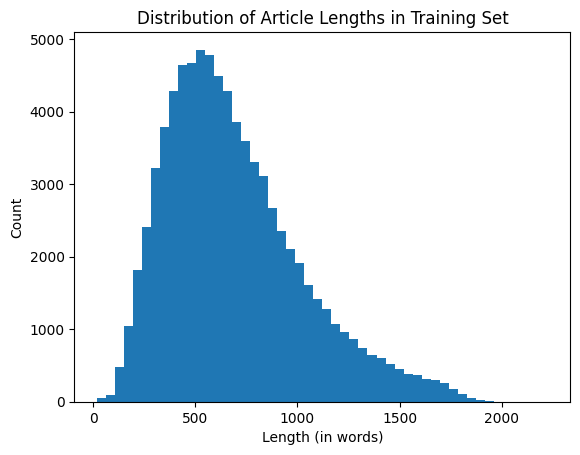

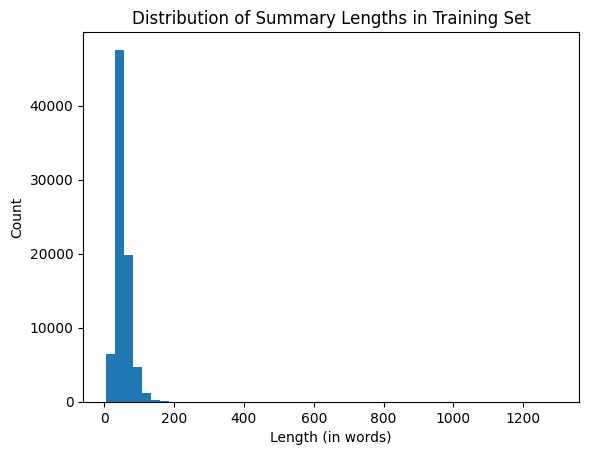

In [6]:
plt.hist(train_df['article_len'], bins=50)
plt.title('Distribution of Article Lengths in Training Set')
plt.xlabel('Length (in words)')
plt.ylabel('Count')
plt.show()

plt.hist(train_df['highlights_len'], bins=50)
plt.title('Distribution of Summary Lengths in Training Set')
plt.xlabel('Length (in words)')
plt.ylabel('Count')
plt.show()


### EDA-1: Most common 1- gram, 2- gram, 3-gram, 4-grams

In [5]:
train_df['text'] = train_df['article'] + ' ' + train_df['highlights']

corpus = ' '.join(train_df['text'].tolist())

# Tokenize the text
tokens = corpus.lower().split()

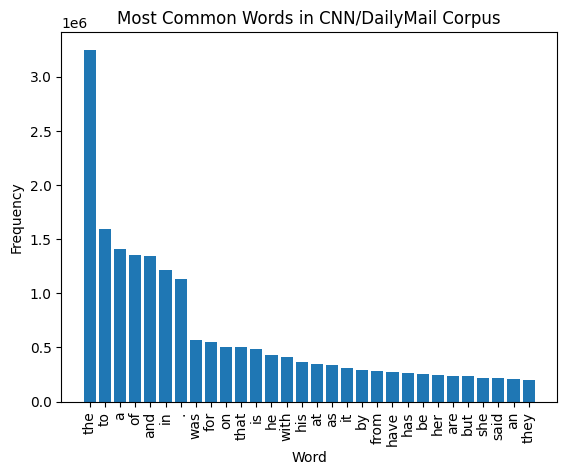

In [9]:

# Count the frequency of each token
word_counts = Counter(tokens)
# Get the most common words
most_common_words = word_counts.most_common(30)
# Plot the bar chart
plt.bar([x[0] for x in most_common_words], [x[1] for x in most_common_words], orientation='vertical')
plt.title('Most Common Words in CNN/DailyMail Corpus')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Remove the stop words
filtered_tokens = [token for token in tokens if token not in stop_words]

# Count the frequency of each token
filtered_word_counts = Counter(filtered_tokens)




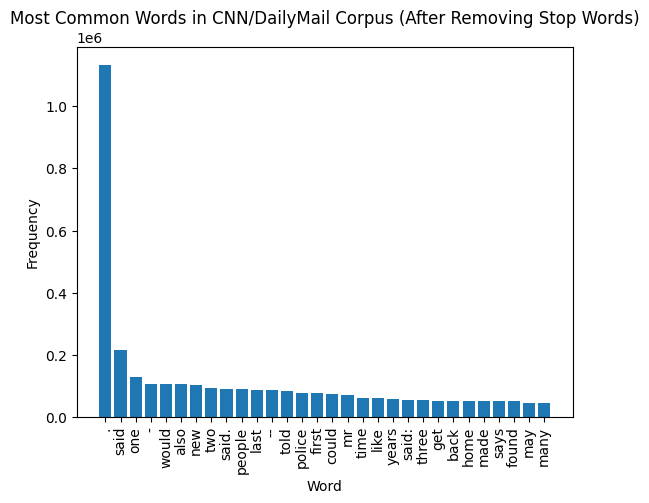

In [10]:
# Get the most common words
filtered_most_common_words = filtered_word_counts.most_common(30)

# Plot the bar chart
plt.bar([x[0] for x in filtered_most_common_words], [x[1] for x in filtered_most_common_words], orientation='vertical')
plt.title('Most Common Words in CNN/DailyMail Corpus (After Removing Stop Words)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from nltk import ngrams
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import matplotlib.pyplot as plt

train_df = pd.read_csv('/content/drive/MyDrive/train.csv', nrows = 40000)

train_df['text'] = train_df['article'] + ' ' + train_df['highlights']

corpus = ' '.join(train_df['text'].tolist())

# Tokenize the text
tokens = corpus.lower().split()

# Tokenize the text
tokens = corpus.lower().split()




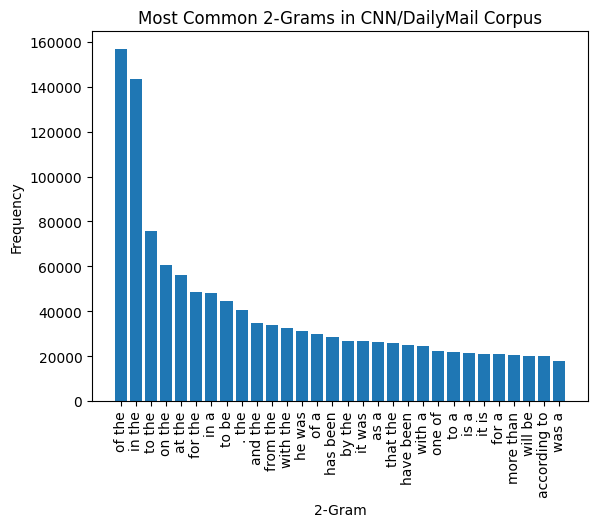

In [6]:
# Create a list of 2-grams
n = 2
ngrams_list = list(ngrams(tokens, n))

# Count the frequency of each n-gram
ngram_counts = Counter(ngrams_list)

# Get the most common n-grams
most_common_ngrams = ngram_counts.most_common(30)

# Plot the bar chart
plt.bar([' '.join(x[0]) for x in most_common_ngrams], [x[1] for x in most_common_ngrams])
plt.title(f'Most Common {n}-Grams in CNN/DailyMail Corpus')
plt.xlabel(f'{n}-Gram')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

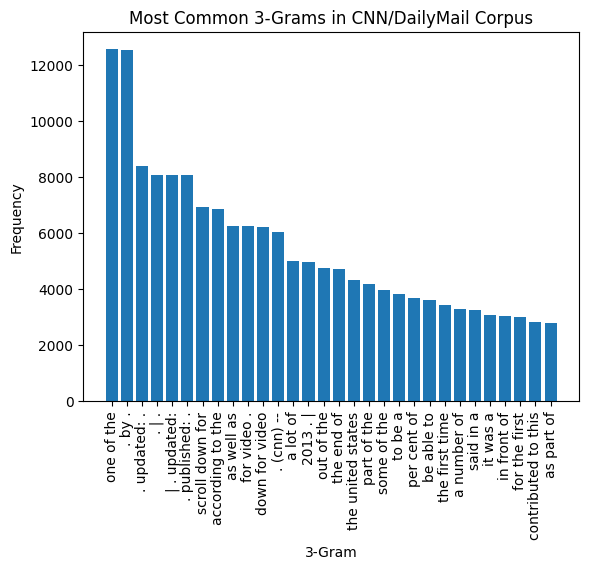

In [3]:
# Create a list of 2-grams
n = 3
ngrams_list = list(ngrams(tokens, n))

# Count the frequency of each n-gram
ngram_counts = Counter(ngrams_list)

# Get the most common n-grams
most_common_ngrams = ngram_counts.most_common(30)

# Plot the bar chart
plt.bar([' '.join(x[0]) for x in most_common_ngrams], [x[1] for x in most_common_ngrams])
plt.title(f'Most Common {n}-Grams in CNN/DailyMail Corpus')
plt.xlabel(f'{n}-Gram')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


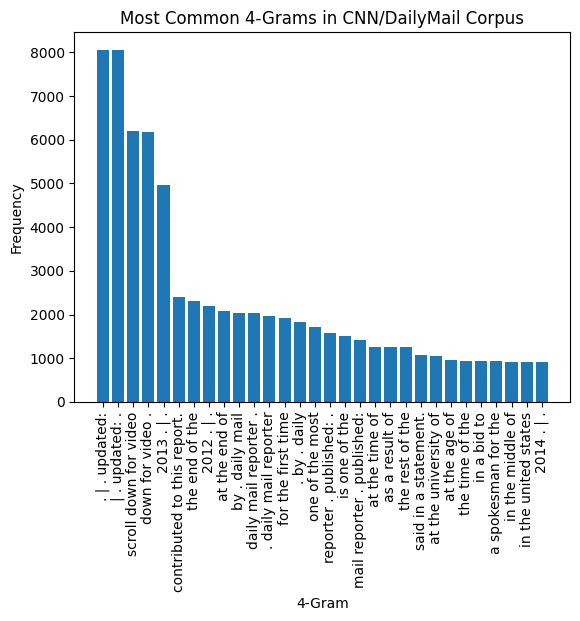

In [4]:
# Create a list of 4-grams
n = 4
ngrams_list = list(ngrams(tokens, n))

# Count the frequency of each n-gram
ngram_counts = Counter(ngrams_list)

# Get the most common n-grams
most_common_ngrams = ngram_counts.most_common(30)

# Plot the bar chart
plt.bar([' '.join(x[0]) for x in most_common_ngrams], [x[1] for x in most_common_ngrams])
plt.title(f'Most Common {n}-Grams in CNN/DailyMail Corpus')
plt.xlabel(f'{n}-Gram')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


### EDA-3: Box Plots

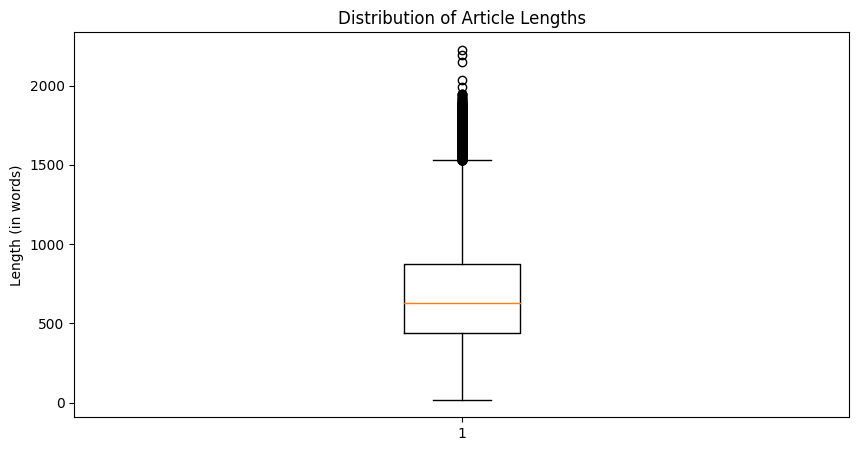

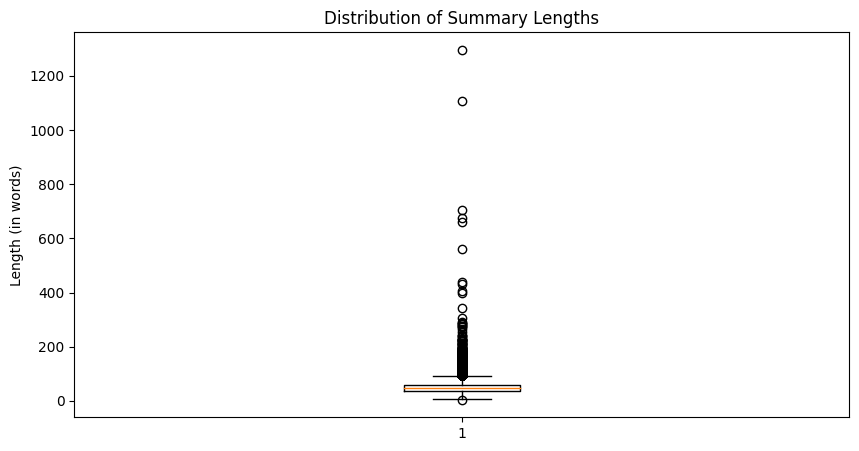

In [5]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv', nrows=80000)

# Create a new column for the length of the article
df['article_len'] = df['article'].apply(lambda x: len(x.split()))

# Create a new column for the length of the summary
df['summary_len'] = df['highlights'].apply(lambda x: len(x.split()))

# Create a box plot of article lengths
plt.figure(figsize=(10, 5))
plt.boxplot(df['article_len'])
plt.title('Distribution of Article Lengths')
plt.ylabel('Length (in words)')
plt.show()

# Create a box plot of summary lengths
plt.figure(figsize=(10, 5))
plt.boxplot(df['summary_len'])
plt.title('Distribution of Summary Lengths')
plt.ylabel('Length (in words)')
plt.show()
